<a href="https://colab.research.google.com/github/mspatke/Deep-Learning-with-Tensorflow/blob/main/Spam_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 5.1. Setup

Install required text processing libraries for the example

In [4]:
# !pip install nltk

In [5]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### 5.2. Creating Text Representations

Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#load spam data and review content
spam_data = pd.read_csv("Spam-Classification.csv")

print("\nLoaded Data :\n------------------------------------")
print(spam_data.head())


Loaded Data :
------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [7]:
#Separate feature and target data
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]

In [9]:
import nltk
import tensorflow as tf


def customtokenize(str):

  tokens= nltk.word_tokenize(str)
  nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
  lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
  return lemmatized





from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=customtokenize)
#transform feature input to TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)
tfidf_array =tfidf.toarray()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:

#Build a label encoder for target variable to convert strings to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

spam_classes = label_encoder.fit_transform(spam_classes_raw)

#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

In [16]:
print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

TF-IDF Matrix Shape :  (1500, 4566)
One-hot Encoding Shape :  (1500, 2)


In [17]:
X_train.shape

(1350, 4566)

### 5.3. Building and Evaluating the Model

In [27]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Setup Hyper Parameters for building the model
NB_CLASSES=2
N_HIDDEN=32



model = tf.keras.models.Sequential()

model.add(keras.layers.Dense( N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                             name ='Hidden-Layer-1',
                             activation = 'relu'))


model.add(keras.layers.Dense(N_HIDDEN,
                             name ='Hidden-Layer-2',
                             activation = 'relu')),


model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147266 (575.26 KB)
Trainable params: 147266 (575.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
4566//256

17


Training Progress:
------------------------------------
Epoch 1/50
5/5 [==============================] - 1s 63ms/step - loss: 0.6900 - accuracy: 0.5926 - val_loss: 0.6814 - val_accuracy: 0.7259
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.6721 - accuracy: 0.8333 - val_loss: 0.6612 - val_accuracy: 0.9000
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 0.6414 - accuracy: 0.9370 - val_loss: 0.6256 - val_accuracy: 0.9296
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.5988 - accuracy: 0.9630 - val_loss: 0.5839 - val_accuracy: 0.9519
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.5477 - accuracy: 0.9778 - val_loss: 0.5385 - val_accuracy: 0.9519
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 0.4934 - accuracy: 0.9806 - val_loss: 0.4915 - val_accuracy: 0.9556
Epoch 7/50
5/5 [==============================] - 0s 16ms/step - loss: 0.4383 - accuracy: 0.9861 - val_loss: 

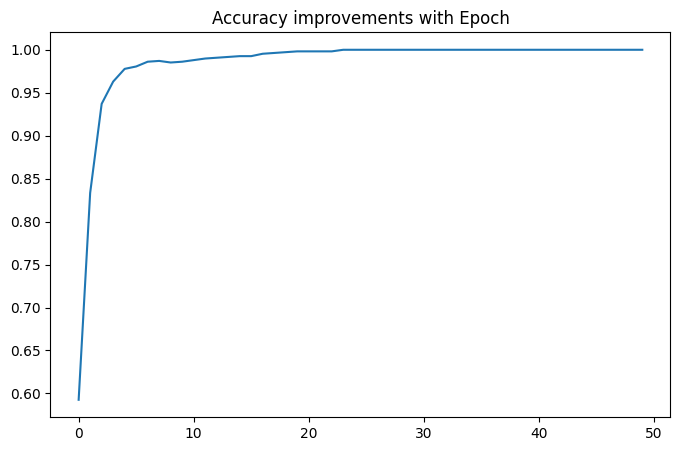


Evaluation against Test Dataset :
------------------------------------
5/5 [==============================] - 0s 4ms/step - loss: 0.2139 - accuracy: 0.9467


[0.21392808854579926, 0.9466666579246521]

In [29]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training
BATCH_SIZE=256
EPOCHS=50
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### 5.4. Predicting for Text

In [30]:
#Predict for multiple samples using batch processing

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest",
                                    "Yup I will come over"]).toarray()

print(predict_tfidf.shape)

#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(2, 4566)
1/1 [==============================] - 0s 202ms/step
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']
